In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/capstone_dynamic/dynamic.csv', delimiter=',', header=None, skiprows=1)

In [4]:
df.head()

,0,1,2,3
0,0,0.600890,0.511320,1.227168
1,0,0.151806,0.099007,0.158411
2,0,0.444629,0.679138,1.629932
3,1,0.033840,0.204071,0.408143
4,0,0.465516,0.202439,0.485853


In [5]:
x = df.iloc[:, :3]
y = df.iloc[:, 3:]

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_dim=3)])
model.compile(loss = 'mse', optimizer='sgd', metrics=['mse'])
history = model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
157/157 [==============================] - 1s 1ms/step - loss: 0.2028 - mse: 0.2028
Epoch 2/100
157/157 [==============================] - 0s 1ms/step - loss: 0.1304 - mse: 0.1304
Epoch 3/100
157/157 [==============================] - 0s 1ms/step - loss: 0.1036 - mse: 0.1036
Epoch 4/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0830 - mse: 0.0830
Epoch 5/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0670 - mse: 0.0670
Epoch 6/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0544 - mse: 0.0544
Epoch 7/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0446 - mse: 0.0446
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0368 - mse: 0.0368
Epoch 9/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0308 - mse: 0.0308
Epoch 10/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0261 - mse: 0.0261
Epoch 11/100
157/157 [=================

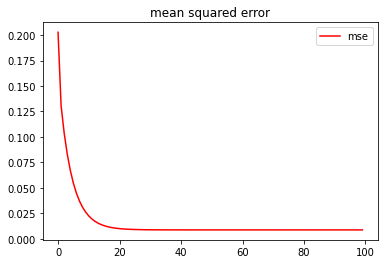

<Figure size 432x288 with 0 Axes>

In [7]:
mse = history.history['mse']

epochs = range(len(mse))

plt.plot(epochs, mse, 'r', label='mse')
plt.title('mean squared error')
plt.legend(loc=0)
plt.figure()

plt.show()

In [8]:
list = [[1, 0.36, 0.2]]
df_predict = pd.DataFrame(list, columns=['week', 'enter_hour', 'spent_hours'], dtype = float) 
print(df_predict)

   week  enter_hour  spent_hours
0   1.0        0.36          0.2


In [9]:
prediction = model.predict(df_predict.iloc[:, :])
fee_predict = prediction[0][0]
print(df_predict)
print("estimated fee: ${:.2f}".format(fee_predict*10))

   week  enter_hour  spent_hours
0   1.0        0.36          0.2
estimated fee: $5.35


In [14]:
import time
saved_model_path = "./dynamic_{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [16]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.2 MB/s 
     |████████████████████████████████| 40 kB 5.4 MB/s 
     |████████████████████████████████| 462 kB 11.3 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [17]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./